### <center> <h1>Analyzing Covid-19 Data and Predicting Confirmed and Deaths Cases In Morocco </h1> </center> 

## Importing required libraries 

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
%matplotlib inline 
import numpy as np
import seaborn as sns
sns.set(font_scale=1.5)
from scipy import stats
import re
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])


## Loading and Preprocessing the data 

### About the Data: This dataset contains historical Covid-19 data of confirmed,deaths,and recovered cases , last update was done in 06/18/2020.

#### Let's start by importing the data.

In [2]:
Data=pd.read_csv("covid_19_data.csv") 
Data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
# getting infos about the columns we're working with
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45179 entries, 0 to 45178
Data columns (total 8 columns):
SNo                45179 non-null int64
ObservationDate    45179 non-null object
Province/State     26150 non-null object
Country/Region     45179 non-null object
Last Update        45179 non-null object
Confirmed          45179 non-null float64
Deaths             45179 non-null float64
Recovered          45179 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.8+ MB


In [4]:
Data_MA=Data[Data['Country/Region']=="Morocco"].reset_index(drop=True)

In [5]:
Data_MA.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,3058,03/02/2020,NaN,Morocco,2020-03-02T22:33:09,1.0,0.0,0.0
1,3207,03/03/2020,NaN,Morocco,2020-03-03T15:33:02,1.0,0.0,0.0
2,3369,03/04/2020,NaN,Morocco,2020-03-03T15:33:02,1.0,0.0,0.0
3,3506,03/05/2020,NaN,Morocco,2020-03-05T13:53:03,2.0,0.0,0.0
4,3691,03/06/2020,NaN,Morocco,2020-03-05T13:53:03,2.0,0.0,0.0


In [6]:
Data_MA.drop(['SNo','Province/State','Last Update'], axis=1, inplace=True)


In [7]:
Data_MA['Active'] = Data_MA['Confirmed'] - Data_MA['Deaths'] - Data_MA['Recovered']
Data_MA.tail(20)

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Active
89,05/30/2020,Morocco,7780.0,204.0,5401.0,2175.0
90,05/31/2020,Morocco,7807.0,205.0,5459.0,2143.0
91,06/01/2020,Morocco,7833.0,205.0,5893.0,1735.0
92,06/02/2020,Morocco,7866.0,206.0,6410.0,1250.0
93,06/03/2020,Morocco,7922.0,206.0,6866.0,850.0
94,06/04/2020,Morocco,8003.0,208.0,7195.0,600.0
95,06/05/2020,Morocco,8071.0,208.0,7268.0,595.0
96,06/06/2020,Morocco,8151.0,208.0,7315.0,628.0
97,06/07/2020,Morocco,8224.0,208.0,7364.0,652.0
98,06/08/2020,Morocco,8302.0,208.0,7408.0,686.0


In [8]:
Dates=list()
for k in Data_MA["ObservationDate"]:    
    k = k[:-5]
    Dates.append(str(k))

Data_MA['ObservationDate']=Dates
Data_MA.head()
    

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Active
0,03/02,Morocco,1.0,0.0,0.0,1.0
1,03/03,Morocco,1.0,0.0,0.0,1.0
2,03/04,Morocco,1.0,0.0,0.0,1.0
3,03/05,Morocco,2.0,0.0,0.0,2.0
4,03/06,Morocco,2.0,0.0,0.0,2.0


In [9]:
Data_MA.shape 

(109, 6)

## Exploratory data analysis and visualization

#### Line plots of the evolution of cases

In [10]:
#creating confirmed cases dataframe
Conf_cases = Data_MA[['ObservationDate', "Confirmed"]]
Conf_cases.set_index('ObservationDate', inplace=True)


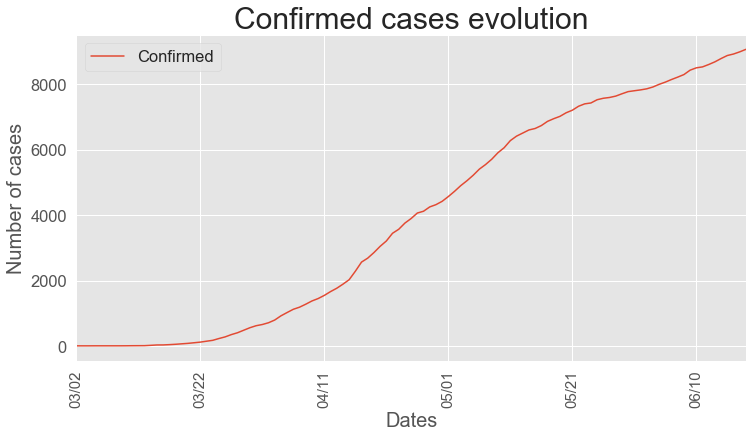

In [11]:
Conf_cases.plot(kind='line', figsize=(12, 6))
plt.xticks(rotation = 90, fontsize = 15)

plt.xlabel('Dates',fontsize=20)
plt.ylabel('Number of cases',fontsize=20)
plt.title('Confirmed cases evolution',fontsize=30) 

plt.show()

In [12]:
# creating the data frame to visualize the evolutions in one line plot
Conf_dead_rec=Data_MA[['ObservationDate', "Confirmed","Deaths","Recovered"]]
Conf_dead_rec.set_index('ObservationDate', inplace=True)

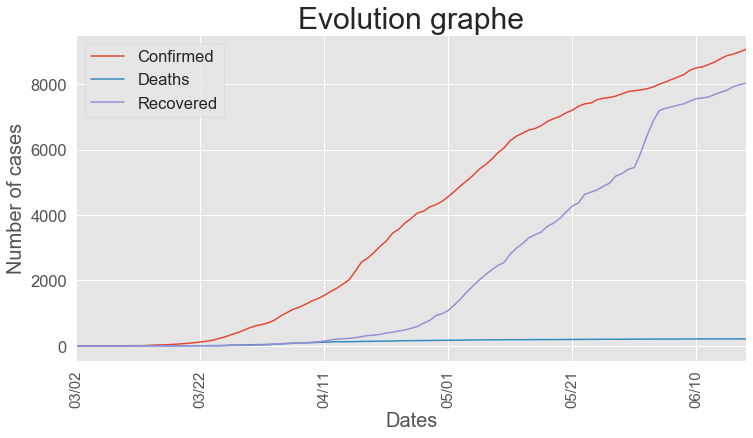

In [13]:
Conf_dead_rec.plot(kind='line', figsize=(12, 6))

plt.xticks(rotation = 90, fontsize = 15)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Number of cases',fontsize=20)
plt.title('Evolution graphe',fontsize=30) 

plt.show()

#### We notice that confirmed and recovered cases have similar trends , while deaths cases remained low , which indicates Morocco is handling the pandemic very well

### Creating scatter plots to visualize the nature of relationship between the attributes

Text(0.5, 1.0, 'Confirmed/Active')

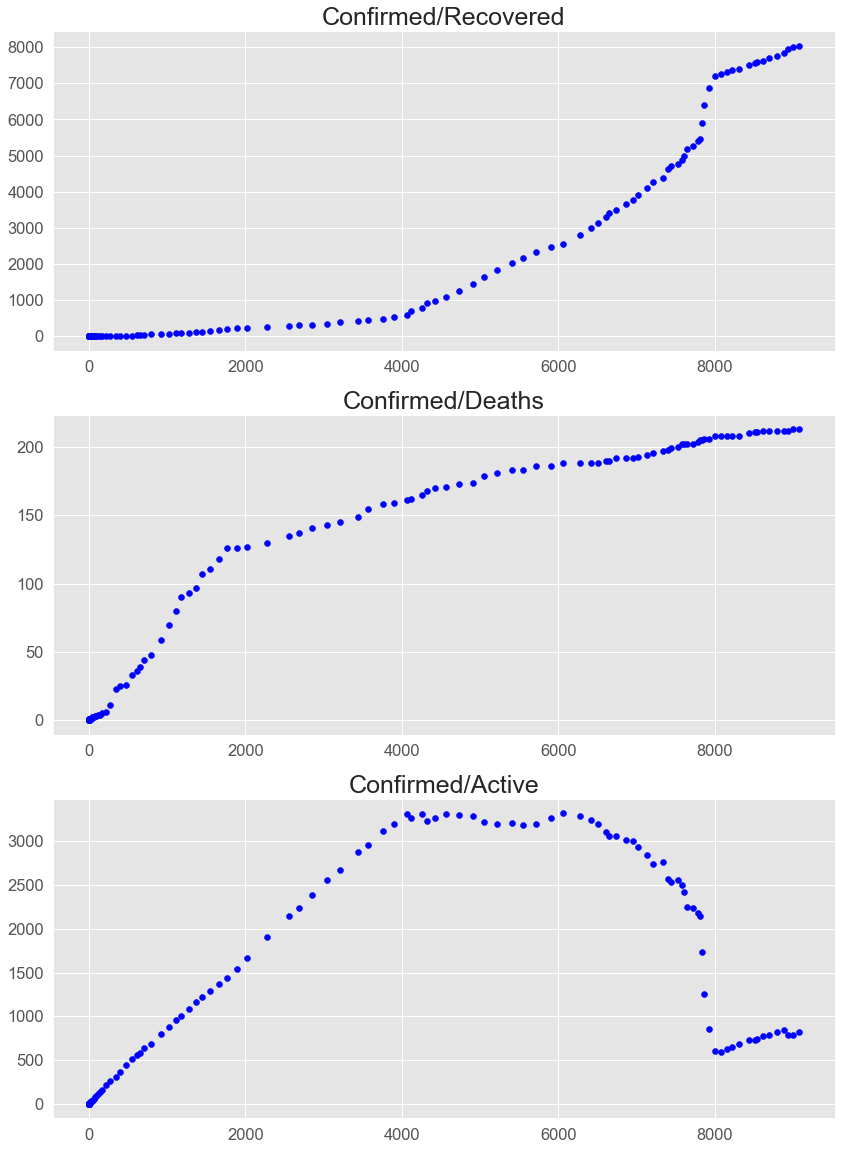

In [14]:
fig, (ax1, ax2,ax3) = plt.subplots(3,figsize=(14,20))

ax1.scatter(Data_MA.Confirmed, Data_MA.Recovered,  color='blue')
ax1.set_title('Confirmed/Recovered',fontsize=25)
ax2.scatter(Data_MA.Confirmed, Data_MA.Deaths,  color='blue')
ax2.set_title('Confirmed/Deaths',fontsize=25)
ax3.scatter(Data_MA.Confirmed, Data_MA.Active,  color='blue')
ax3.set_title('Confirmed/Active',fontsize=25)

#### The above scatter plots indicates that simple linear regression would be a good model for our data.
#### Let's analyse the correlations between our Independent variables

In [15]:
Data_MA[['Confirmed','Deaths' ,'Recovered','Active']].corr()

,Confirmed,Deaths,Recovered,Active
Confirmed,1.000000,0.944797,0.920272,0.504302
Deaths,0.944797,1.000000,0.769734,0.693735
Recovered,0.920272,0.769734,1.000000,0.126259
Active,0.504302,0.693735,0.126259,1.000000


### Let's run Pearson Test to make sure the correlations are significant !

In [16]:
pearson_coef, p_value = stats.pearsonr(Data_MA['Confirmed'], Data_MA['Deaths'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)                                                 

The Pearson Correlation Coefficient is 0.9447971137818318  with a P-value of P = 1.1485439585649548e-53


In [17]:
pearson_coef, p_value = stats.pearsonr(Data_MA['Confirmed'], Data_MA['Recovered'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9202723949768212  with a P-value of P = 2.0776769129448736e-45


In [18]:
pearson_coef, p_value = stats.pearsonr(Data_MA['Deaths'], Data_MA['Recovered'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7697336512386365  with a P-value of P = 1.379104588318919e-22


In [19]:
pearson_coef, p_value = stats.pearsonr(Data_MA['Confirmed'], Data_MA['Active'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)     

The Pearson Correlation Coefficient is 0.5043024584388275  with a P-value of P = 2.2598185817880327e-08


In [20]:
pearson_coef, p_value = stats.pearsonr(Data_MA['Deaths'], Data_MA['Active'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.693735446456408  with a P-value of P = 6.169615266219294e-17


#### As we see , the P-values of the correlations is lower than the conventional 0.05 , so these correlations are statistically significant.

#### For predicting confirmed cases, deaths and recovered variables will be used.  <br> For predicting Deaths,confirmed and recovered variables will be used.


## Building The Models 

### Let's start by using seaborn regplots to get a first visualization of how a regression model would fit our data 

Text(0.5, 1.0, 'Confirmed/Deaths Regresion plot')

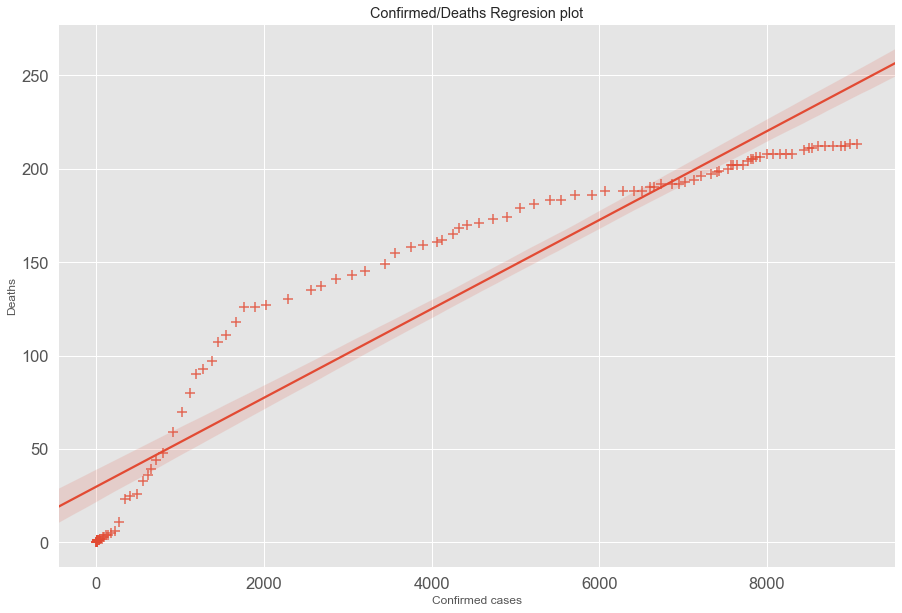

In [21]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='Confirmed', y='Deaths', data=Data_MA, marker='+',scatter_kws={'s': 100})

ax.set(xlabel='Confirmed cases', ylabel='Deaths') 
ax.set_title('Confirmed/Deaths Regresion plot') 

Text(0.5, 1.0, 'Confirmed/Recovered Regresion plot')

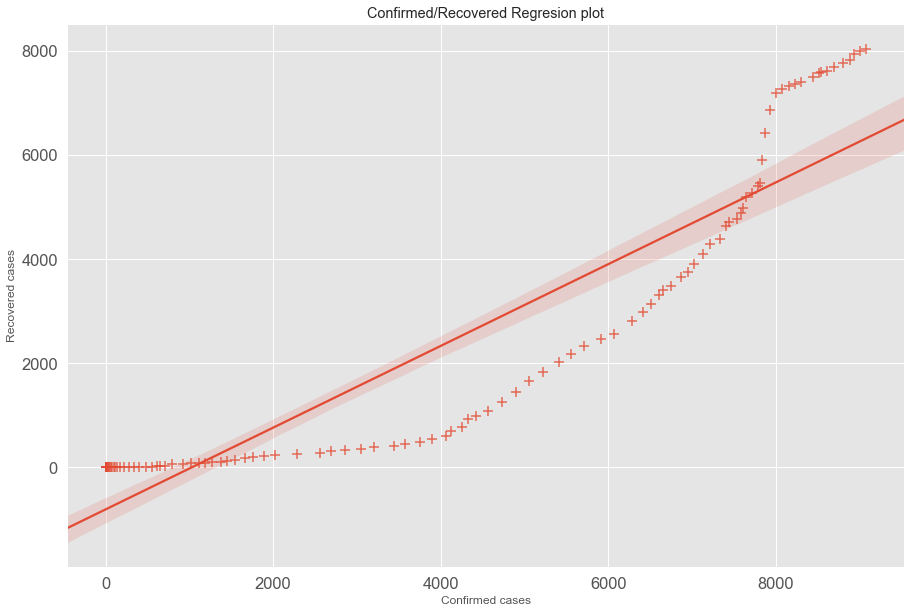

In [22]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='Confirmed', y='Recovered', data=Data_MA, marker='+',scatter_kws={'s': 100})

ax.set(xlabel='Confirmed cases', ylabel='Recovered cases') 
ax.set_title('Confirmed/Recovered Regresion plot') 

#### As we see above , a regression model is a great fit for our data.
#### We might experimentt with polynomial regression as well !

### Let's start building the models 

####  As the norms , we start by splitting our data into train and test data .

In [23]:
#selecting the features that will be used to build the models from the dataframe
Models_Data=Data_MA[['Confirmed','Deaths' ,'Recovered']]
#splitting 
msk = np.random.rand(len(Models_Data)) < 0.8
train = Models_Data[msk]
test = Models_Data[~msk]


### 1-The confirmed cases model 

####  we create the  model and fit our data into it !

In [24]:
Conf_cases_model = LinearRegression()
X = train[['Deaths' ,'Recovered']]
Y = train['Confirmed']
Conf_cases_model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Let's see the Coefficients and scores for our model 

In [25]:
print ('Coefficients: ', Conf_cases_model.coef_)
print ('Intercept: ',Conf_cases_model.intercept_)


Coefficients:  [23.00128191  0.56663723]
Intercept:  -201.35263879243166


In [26]:
print('The R-square on Train data is: ', Conf_cases_model.score(X, Y))

The R-square on Train data is:  0.9827752755447136


#### Testing the model on test data 

In [27]:
x_test = np.asanyarray(test[['Deaths' ,'Recovered']])
y_test = np.asanyarray(test[['Confirmed']])
y_pred = Conf_cases_model.predict(x_test)


In [28]:
print('The R-square on Test data is: ', Conf_cases_model.score(x_test, y_test))

The R-square on Test data is:  0.9876215212968595


In [29]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))


Mean absolute error: 4018.78
Residual sum of squares (MSE): 25705760.94


#### Now, we visualize the distribution of the actual test values vs the values that our model predicted

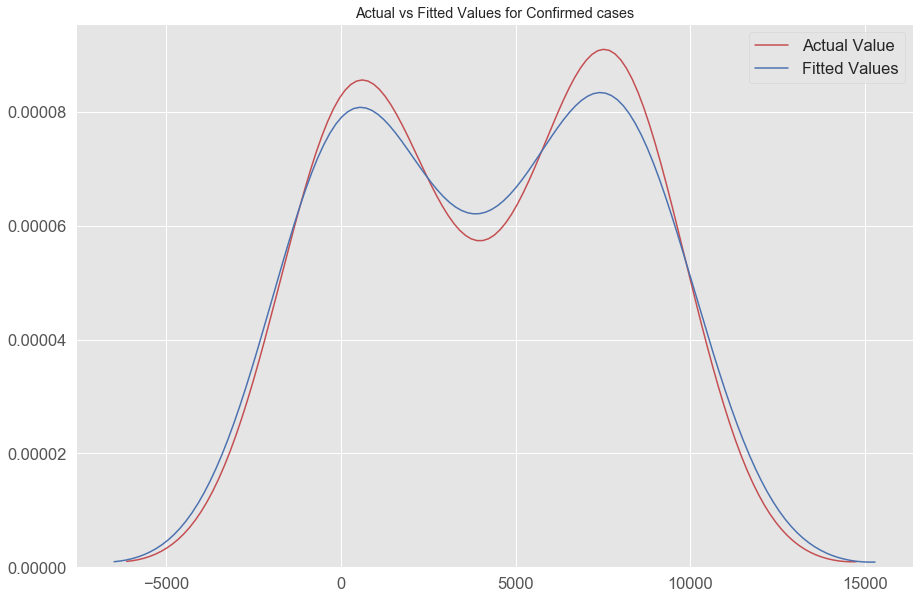

In [30]:
plt.figure(figsize=(15, 10))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Confirmed cases')
plt.show()
plt.close()

#### Let's make a prediction using our model , let's suppose that we have 214 deaths and 8426 recovered cases .

In [31]:
a=np.array([216,8426]).reshape(1, -1)
print("Precited Confirmed cases is :",Conf_cases_model.predict(a))

Precited Confirmed cases is : [9541.40957093]


### Let's experiment with polynomial regression:

#### first we need to transform our data 

In [32]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(X)
train_x_poly

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00,

#### Now we create the model

In [33]:
Poly_conf_model = LinearRegression()
train_y_ = Poly_conf_model.fit(train_x_poly, Y)
# The coefficients
print ('Coefficients: ', Poly_conf_model.coef_)
print ('Intercept: ',Poly_conf_model.intercept_)


Coefficients:  [ 0.00000000e+00  1.46622961e+00  8.51296117e-01  1.17235314e-01
 -8.18226532e-04 -3.76885025e-05]
Intercept:  102.00039490955305


#### Let's see the Coefficients and scores for our model 

In [34]:
test_x_poly = poly.fit_transform(x_test)
test_y_ = Poly_conf_model.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print('The R-square on Test data is: ', Poly_conf_model.score(test_x_poly, y_test))

Mean absolute error: 3935.72
Residual sum of squares (MSE): 25418300.94
The R-square on Test data is:  0.9974466016825262


#### The score improved slightly  !

#### Let's visualize the distribution of the actual test values vs the values that the new model predicted


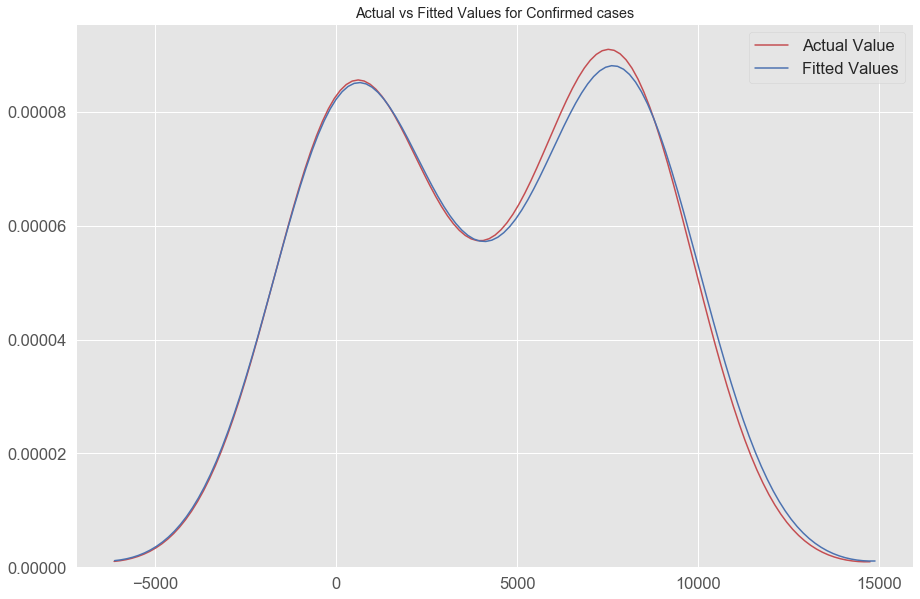

In [35]:

plt.figure(figsize=(15, 10))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(test_y_, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Confirmed cases')



plt.show()
plt.close()

### 2-The Deaths cases model 


#### Creating the model and fitting the data into it 

In [36]:
deaths_model = LinearRegression()
X = train[['Confirmed' ,'Recovered']]
Y = train['Deaths']
deaths_model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Let's see the Coefficients and scores for our model 

In [37]:
print ('Coefficients: ', deaths_model.coef_)
print ('Intercept: ',deaths_model.intercept_)

Coefficients:  [ 0.03887027 -0.01967644]
Intercept:  15.94467397845736


In [38]:
print('The R-square on Train data is: ', deaths_model.score(X, Y))

The R-square on Train data is:  0.9537927703200642


#### Testing the model on test data 

In [39]:
deaths_predicted = deaths_model.predict(test[['Confirmed' ,'Recovered']])
deaths_predicted

array([ 15.98354424,  16.02241451,  16.02241451,  16.17789557,
        16.58579206,  21.4047398 ,  26.47658558,  34.30773764,
        54.13580582,  90.11218664, 141.68653337, 165.9127713 ,
       197.2442161 , 212.57221163, 212.02297946, 214.78017122,
       214.42395361, 212.08286642, 188.77645282, 185.45139409,
       192.88252093, 197.80059393, 200.7225095 ])

#### Let's visualize the distribution of the actual test values vs the values that the model predicted


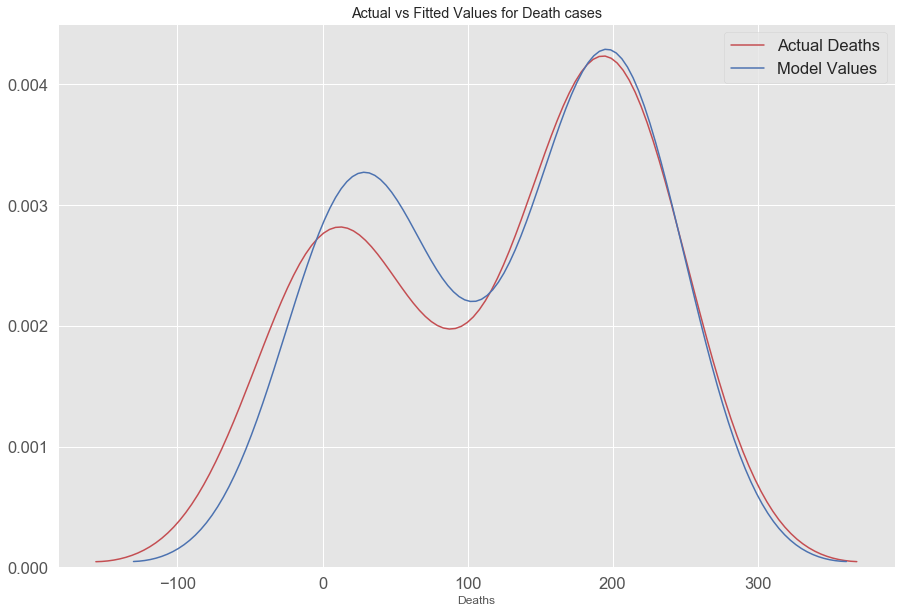

In [40]:
plt.figure(figsize=(15, 10))


ax1 = sns.distplot(test['Deaths'], hist=False, color="r", label="Actual Deaths")
sns.distplot(deaths_predicted, hist=False, color="b", label="Model Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Death cases')


plt.show()
plt.close()

#### Let's make a prediction using our model , let's suppose that we have 10907 confirmed and 8426 recovered cases .

In [41]:
a=np.array([10907,8426]).reshape(1, -1)
deaths_model.predict(a)

array([274.10894336])

### Let's use the  polynomial regression and see if the score improves


#### Transforming the data 

In [42]:
poly2 = PolynomialFeatures(degree=2)
train_x_death_poly = poly.fit_transform(train[['Confirmed' ,'Recovered']])
train_x_death_poly

array([[1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 2.0000000e+00, 0.0000000e+00, 4.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 2.0000000e+00, 0.0000000e+00, 4.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 2.0000000e+00, 0.0000000e+00, 4.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.0000000e+00, 0.0000000e+00, 9.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.0000000e+00, 0.0000000e+00, 2.5000000e+01,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 7.0000000e+00, 1.0000000e+00, 4.9000000e+01,
        7.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 2.8000000e+01, 1.0000000e+00, 7.8400000e+02,
        2.8000000e+01, 1.0000000e+00],
       [1.0000000e+00, 2.9000000e+01,

#### Now we create the model 

In [43]:
Poly_death = LinearRegression()
train_y_death = Poly_death.fit(train_x_death_poly,train['Deaths'])
# The coefficients
print ('Coefficients: ', Poly_death.coef_)
print ('Intercept: ',Poly_death.intercept_)

Coefficients:  [ 0.00000000e+00  8.73023914e-02 -4.24494785e-02 -1.22085579e-05
  1.66929920e-05 -6.97107834e-06]
Intercept:  -2.9716545350580787


#### Let's see the Coefficients and scores for our model 

In [44]:

predd_death = Poly_death.predict(poly2.fit_transform(test[['Confirmed' ,'Recovered']]))
print("Mean absolute error: %.2f" % np.mean(np.absolute(predd_death - test['Deaths'])))
print("Residual sum of squares (MSE): %.2f" % np.mean((predd_death - test['Deaths']) ** 2))

print('The R-square on Test data is: ', Poly_death.score(train_x_death_poly, train['Deaths']))


Mean absolute error: 3.17
Residual sum of squares (MSE): 17.32
The R-square on Test data is:  0.9960872028449168


#### The score improved !

#### Let's visualize the distribution of the actual test values vs the values that the model predicted


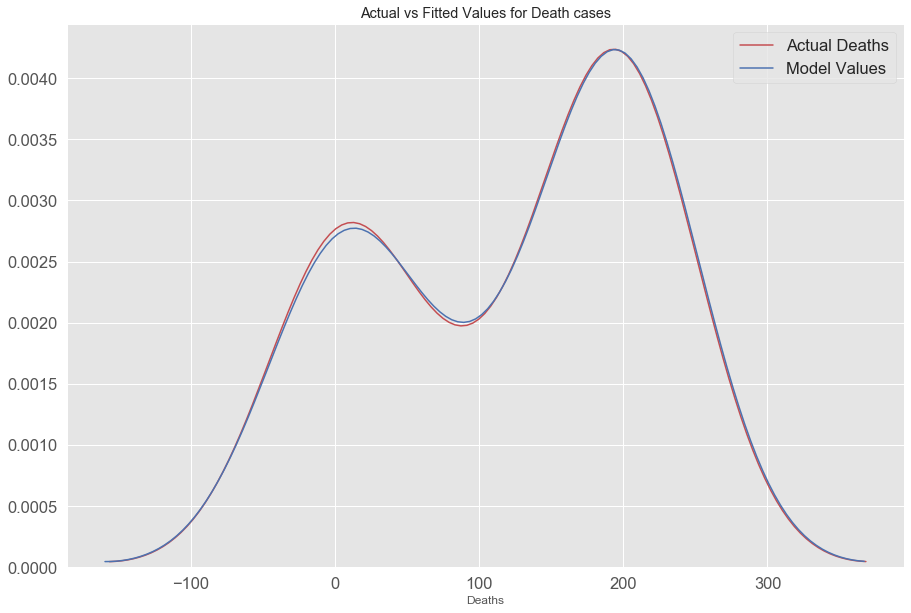

In [45]:
plt.figure(figsize=(15, 10))


ax1 = sns.distplot(test['Deaths'], hist=False, color="r", label="Actual Deaths")
sns.distplot(predd_death, hist=False, color="b", label="Model Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Death cases')


plt.show()
plt.close()

## Conclusion:

### It is nearly impossible to build an accurate model that predicts the evolution of covid-19 inmorocco, considering the lack of Data, and also the nature of the data that we're working with, because this data is exposed to many factors. These models are just experimental/ far from being realistic models that use the hypothesis that there are no real world factors affecting the future data, and that the data will continue in its trend.